In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from brokenaxes import brokenaxes

In [ ]:
res = pd.read_csv(os.path.join("results","proteins", "HIVProtease", "1hhp.dcd_v2_1hhp_trj.pdb.csv"))
entity_name ="HIV-Protease"

In [3]:
labels = [
    f"Method: {row['method']}" + 
    (f", Params: {row['params']}" if row['method'] != "spectral" and row['params'] and len(str(row['params'])) > 5 else '') + 
    (f", Matrix: {row['matrix']}" if pd.notna(row['matrix']) else '') 
    
    for _, row in res.iterrows()
]

# Remove 'nan' and ',nan' from labels




labels = [label.replace('nan', '').replace(',nan', '') for label in labels]
res["new_labels"] = labels


In [4]:
# Ensure clustering is stored as an actual NumPy array
res["clustering"] = res["clustering"].apply(lambda x: np.array(x) if isinstance(x, (list, np.ndarray)) else np.fromstring(x[1:-1], sep=" "))

# Compute the number of unique clusters
res["nr_clusters"] = res["clustering"].apply(lambda x: len(np.unique(x)))


res["final_new_label"] = res["new_labels"] + "\n clusters: " + res["nr_clusters"].astype(str)

res["labels"] = res["final_new_label"]

labels = res["labels"]

In [5]:
res

,name,method,params,matrix,clustering,runtime,Q,new_labels,nr_clusters,final_new_label,labels
0,Spectral,spectral,{'cluster_count': 14},delta,"[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....",0.267175,0.277769,"Method: spectral, Matrix: delta",14,"Method: spectral, Matrix: delta\n clusters: 14","Method: spectral, Matrix: delta\n clusters: 14"
1,HDBSCAN,hdbscan,{},delta,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.157591,1.064369,"Method: hdbscan, Matrix: delta",2,"Method: hdbscan, Matrix: delta\n clusters: 2","Method: hdbscan, Matrix: delta\n clusters: 2"
2,Affinity,affinity,{},delta,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.173063,0.042096,"Method: affinity, Matrix: delta",65,"Method: affinity, Matrix: delta\n clusters: 65","Method: affinity, Matrix: delta\n clusters: 65"
3,Spectral,spectral,{'cluster_count': 14},stddv,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",0.087808,0.258292,"Method: spectral, Matrix: stddv",14,"Method: spectral, Matrix: stddv\n clusters: 14","Method: spectral, Matrix: stddv\n clusters: 14"
4,HDBSCAN,hdbscan,{},stddv,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.089348,1.064369,"Method: hdbscan, Matrix: stddv",2,"Method: hdbscan, Matrix: stddv\n clusters: 2","Method: hdbscan, Matrix: stddv\n clusters: 2"
5,Affinity,affinity,{},stddv,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, ...",0.099514,0.058221,"Method: affinity, Matrix: stddv",57,"Method: affinity, Matrix: stddv\n clusters: 57","Method: affinity, Matrix: stddv\n clusters: 57"
6,Spectral,spectral,{'cluster_count': 14},delta+1std,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...",0.156391,0.276944,"Method: spectral, Matrix: delta+1std",14,"Method: spectral, Matrix: delta+1std\n cluster...","Method: spectral, Matrix: delta+1std\n cluster..."
7,HDBSCAN,hdbscan,{},delta+1std,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.153438,1.064369,"Method: hdbscan, Matrix: delta+1std",2,"Method: hdbscan, Matrix: delta+1std\n clusters: 2","Method: hdbscan, Matrix: delta+1std\n clusters: 2"
8,Affinity,affinity,{},delta+1std,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.169235,0.042096,"Method: affinity, Matrix: delta+1std",65,"Method: affinity, Matrix: delta+1std\n cluster...","Method: affinity, Matrix: delta+1std\n cluster..."
9,Spectral,spectral,{'cluster_count': 14},delta+2std,"[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 9.0...",0.155527,0.248967,"Method: spectral, Matrix: delta+2std",14,"Method: spectral, Matrix: delta+2std\n cluster...","Method: spectral, Matrix: delta+2std\n cluster..."


In [6]:
import ast
nr_of_clusters_fixed = ast.literal_eval(res[res["method"] == "spectral"].iloc[0]["params"])["cluster_count"]

In [7]:
labels

0        Method: spectral, Matrix: delta\n clusters: 14
1          Method: hdbscan, Matrix: delta\n clusters: 2
2        Method: affinity, Matrix: delta\n clusters: 65
3        Method: spectral, Matrix: stddv\n clusters: 14
4          Method: hdbscan, Matrix: stddv\n clusters: 2
5        Method: affinity, Matrix: stddv\n clusters: 57
6     Method: spectral, Matrix: delta+1std\n cluster...
7     Method: hdbscan, Matrix: delta+1std\n clusters: 2
8     Method: affinity, Matrix: delta+1std\n cluster...
9     Method: spectral, Matrix: delta+2std\n cluster...
10    Method: hdbscan, Matrix: delta+2std\n clusters: 2
11    Method: affinity, Matrix: delta+2std\n cluster...
12                       Method: Resicon\n clusters: 14
13    Method: Comodo, Params: Elastic Network\n clus...
14    Method: Comodo, Params: Full Covariance Matrix...
15                       Method: Geostas\n clusters: 14
Name: labels, dtype: object

C:\Users\josef\AppData\Local\Temp\ipykernel_24760\3810816739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\l

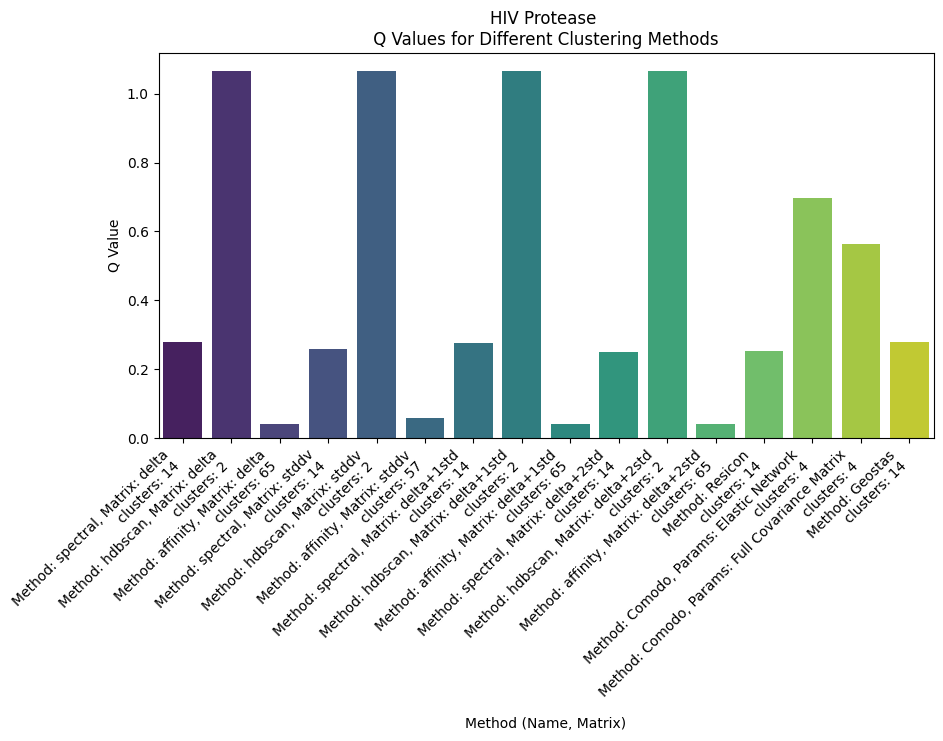

In [8]:
import seaborn as sns
Q_values =  [row['Q'] for _, row in res.iterrows()] 

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("HIV Protease \n Q Values for Different Clustering Methods ")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

C:\Users\josef\AppData\Local\Temp\ipykernel_24760\3712134094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\l

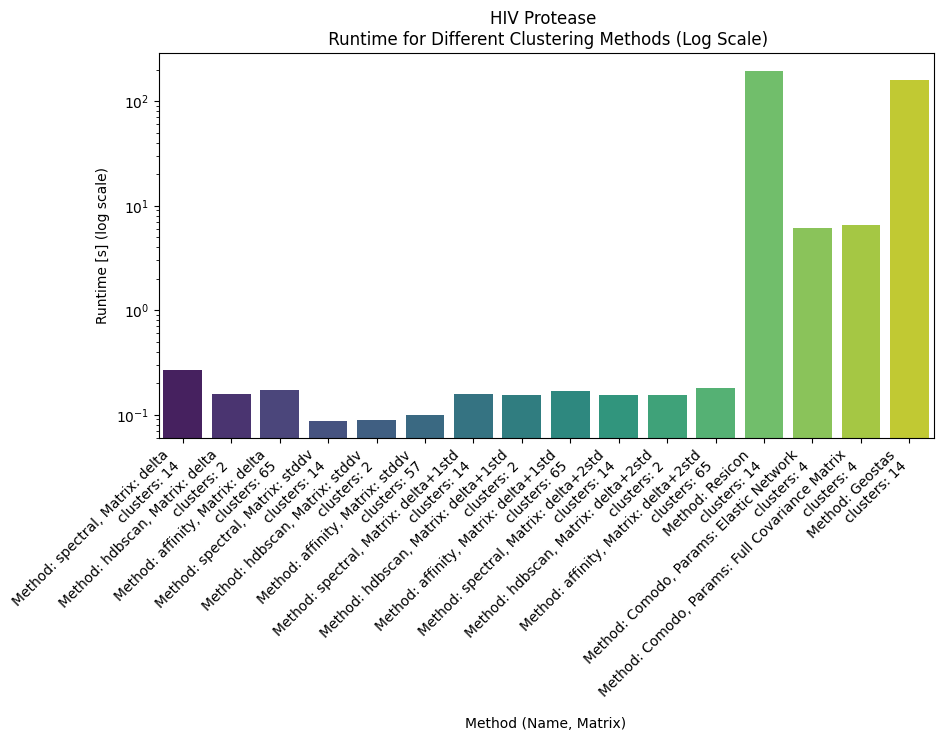

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Q_values = [row['runtime'] for _, row in res.iterrows()]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Set log scale for y-axis
plt.yscale('log')

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Runtime [s] (log scale)")
plt.title("HIV Protease \n Runtime for Different Clustering Methods (Log Scale)")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [10]:
labels

0        Method: spectral, Matrix: delta\n clusters: 14
1          Method: hdbscan, Matrix: delta\n clusters: 2
2        Method: affinity, Matrix: delta\n clusters: 65
3        Method: spectral, Matrix: stddv\n clusters: 14
4          Method: hdbscan, Matrix: stddv\n clusters: 2
5        Method: affinity, Matrix: stddv\n clusters: 57
6     Method: spectral, Matrix: delta+1std\n cluster...
7     Method: hdbscan, Matrix: delta+1std\n clusters: 2
8     Method: affinity, Matrix: delta+1std\n cluster...
9     Method: spectral, Matrix: delta+2std\n cluster...
10    Method: hdbscan, Matrix: delta+2std\n clusters: 2
11    Method: affinity, Matrix: delta+2std\n cluster...
12                       Method: Resicon\n clusters: 14
13    Method: Comodo, Params: Elastic Network\n clus...
14    Method: Comodo, Params: Full Covariance Matrix...
15                       Method: Geostas\n clusters: 14
Name: labels, dtype: object

In [11]:
selected_labels = [0,1,2,3,4,5,6,7,8,-4,-3,-2,-1]

C:\Users\josef\AppData\Local\Temp\ipykernel_24760\3398692722.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\

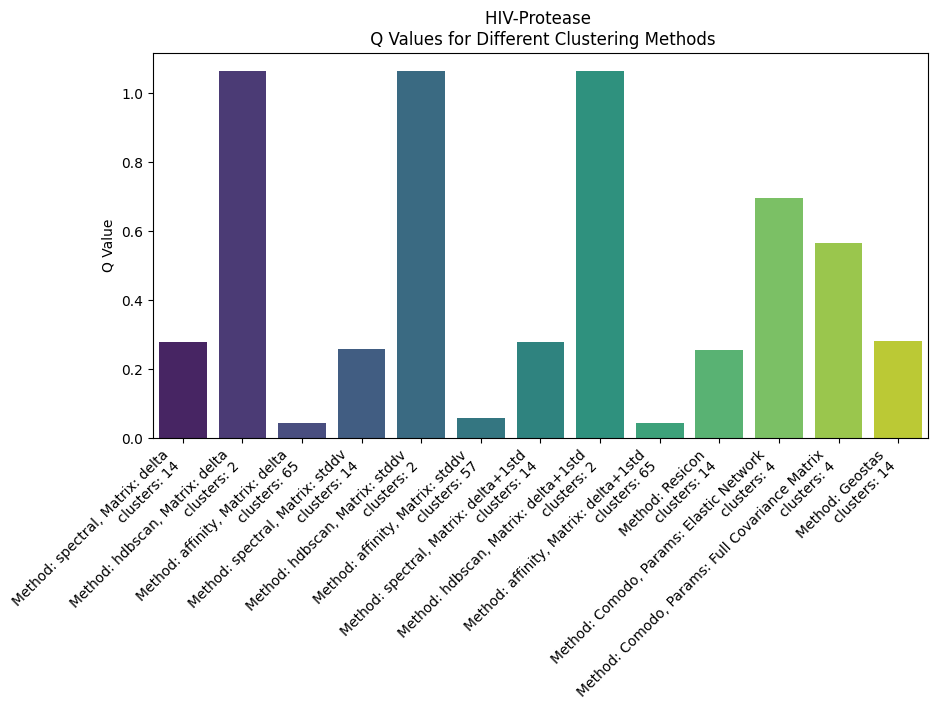

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_labels = [0,1,2,3,4,5,6,7,8,-4,-3,-2,-1]

Q_values =  np.array([row['Q'] for _, row in res.iterrows()])[selected_labels]
labels = np.array(labels)[selected_labels]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.ylabel("Q Value")
plt.title(entity_name + "\n Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

C:\Users\josef\AppData\Local\Temp\ipykernel_24760\3937674283.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\

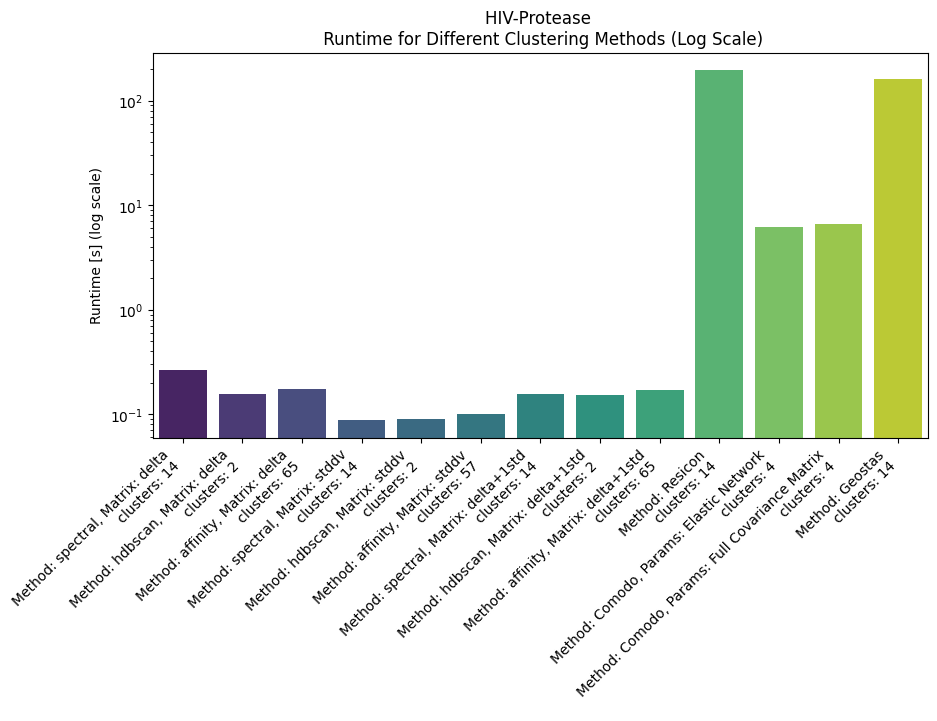

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
selected_labels = [0,1,2,3,4,5,6,7,8,-4,-3,-2,-1]
# Assuming `res` is a pandas DataFrame
Q_values = np.array([row['runtime'] for _, row in res.iterrows()])[selected_labels]
labels = np.array(labels)[selected_labels]
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Set log scale for y-axis
plt.yscale('log')

# Labels and title
plt.ylabel("Runtime [s] (log scale)")
plt.title(entity_name + "\n Runtime for Different Clustering Methods (Log Scale)")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [17]:
res

,name,method,params,matrix,clustering,runtime,Q,new_labels,nr_clusters,final_new_label,labels
0,Spectral,spectral,{'cluster_count': 14},delta,"[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....",0.267175,0.277769,"Method: spectral, Matrix: delta",14,"Method: spectral, Matrix: delta\n clusters: 14","Method: spectral, Matrix: delta\n clusters: 14"
1,HDBSCAN,hdbscan,{},delta,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.157591,1.064369,"Method: hdbscan, Matrix: delta",2,"Method: hdbscan, Matrix: delta\n clusters: 2","Method: hdbscan, Matrix: delta\n clusters: 2"
2,Affinity,affinity,{},delta,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.173063,0.042096,"Method: affinity, Matrix: delta",65,"Method: affinity, Matrix: delta\n clusters: 65","Method: affinity, Matrix: delta\n clusters: 65"
3,Spectral,spectral,{'cluster_count': 14},stddv,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",0.087808,0.258292,"Method: spectral, Matrix: stddv",14,"Method: spectral, Matrix: stddv\n clusters: 14","Method: spectral, Matrix: stddv\n clusters: 14"
4,HDBSCAN,hdbscan,{},stddv,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.089348,1.064369,"Method: hdbscan, Matrix: stddv",2,"Method: hdbscan, Matrix: stddv\n clusters: 2","Method: hdbscan, Matrix: stddv\n clusters: 2"
5,Affinity,affinity,{},stddv,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, ...",0.099514,0.058221,"Method: affinity, Matrix: stddv",57,"Method: affinity, Matrix: stddv\n clusters: 57","Method: affinity, Matrix: stddv\n clusters: 57"
6,Spectral,spectral,{'cluster_count': 14},delta+1std,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, ...",0.156391,0.276944,"Method: spectral, Matrix: delta+1std",14,"Method: spectral, Matrix: delta+1std\n cluster...","Method: spectral, Matrix: delta+1std\n cluster..."
7,HDBSCAN,hdbscan,{},delta+1std,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.153438,1.064369,"Method: hdbscan, Matrix: delta+1std",2,"Method: hdbscan, Matrix: delta+1std\n clusters: 2","Method: hdbscan, Matrix: delta+1std\n clusters: 2"
8,Affinity,affinity,{},delta+1std,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",0.169235,0.042096,"Method: affinity, Matrix: delta+1std",65,"Method: affinity, Matrix: delta+1std\n cluster...","Method: affinity, Matrix: delta+1std\n cluster..."
9,Spectral,spectral,{'cluster_count': 14},delta+2std,"[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 9.0...",0.155527,0.248967,"Method: spectral, Matrix: delta+2std",14,"Method: spectral, Matrix: delta+2std\n cluster...","Method: spectral, Matrix: delta+2std\n cluster..."
